In [111]:
#!pip install dowhy==0.6
#!pip install econml==0.12.0

In [4]:
from itertools import combinations

import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
import dowhy.datasets

from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Causal Inference in Python: An Introduction


Causality was an *enfant terrible* of the big data and statistical learning revolution of the early 2010s. Many people believed (myself included) that having large enough datasets and efficient learning algorithms is sufficient and we do not need the concept of causality at all. Today, causal inference, modeling and discovery is being used more and more broadly across areas – from medical research and neuroscience to marketing and fraud detection. This talk briefly introduces main causal concepts and two Python libraries – DoWhy and EconML – for performing causal inference.

## Causal model with DoWhy & EconML

### Generate a dataset

In [8]:
# Create the dataset
W = np.random.randn(1000)
T = np.random.randn(1000) + .2*W + 3
Y = 6*T + 2*W - 13

df = pd.DataFrame(np.vstack([W, T, Y]).T, columns=['W', 'T', 'Y'])

In [9]:
df

,W,T,Y
0,-1.803591,1.652687,-6.691061
1,-1.324917,1.576854,-6.188709
2,-0.366515,3.831156,9.253908
3,-0.273066,2.678338,2.523895
4,-1.368928,2.638509,0.093199
...,...,...,...
995,-0.804903,3.396999,5.772186
996,1.106200,4.576381,16.670688
997,0.077037,3.934993,10.764033
998,-0.383038,2.329565,0.211315


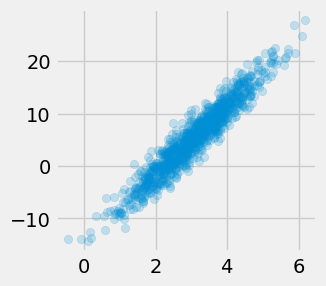

In [10]:
plt.figure(figsize=(3, 3))
plt.scatter(df['T'], df['Y'], alpha=.2)
plt.show()

### Stage 1: Model the problem

#### Stage 1.1 - Define the graph - `GML`

In [11]:
# Create the graph describing the causal structure

graph = """
graph [
    directed 1
    
    node [
        id "T" 
        label "T"
    ]    
    node [
        id "W"
        label "W"
    ]
    node [
        id "Y"
        label "Y"
    ]
    
    edge [
        source "W"
        target "T"
    ]
    
    edge [
        source "W"
        target "Y"
    ]
    
    edge [
        source "T"
        target "Y"
    ]
]
"""

In [12]:
# Remove newlines
graph = graph.replace('\n', '')

#### Stage 1.2 - define the DoWhy model

In [24]:
# With graph
model = CausalModel(
    data=df,
    treatment='T',
    outcome='Y',
    graph=graph
)

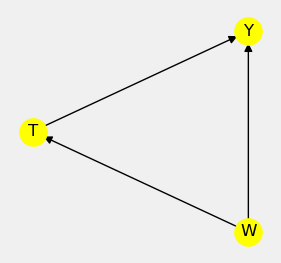

In [25]:
plt.figure(figsize=(3, 3))
model.view_model()
plt.show()

## Stage 2: Identify the estimand

In [26]:
estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                    
────(Expectation(Y|W))
d[T]                  
Estimand assumption 1, Unconfoundedness: If U→{T} and U→Y then P(Y|T,W,U) = P(Y|T,W)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



## Stage 3: Estimate the causal effect

#### Example 1 - Linear Regression

In [27]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.linear_regression'
)

print(f'Estimate of causal effect (linear regression): {estimate.value}')

Estimate of causal effect (linear regression): 6.000000000000005


#### Example 3 - Double Machne Learning

In [28]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.dml.DML',
    method_params={
        'init_params': {
            'model_y': GradientBoostingRegressor(),
            'model_t': GradientBoostingRegressor(),
            'model_final': LassoCV(fit_intercept=False),
        },
        'fit_params': {}}
)

print(f'Estimate of causal effect (DML): {estimate.value}')

Estimate of causal effect (DML): 5.9529044466265


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


## Stage 4: Run refutation tests

In [18]:
refute_results = model.refute_estimate(
    estimand=estimand, 
    estimate=estimate,
    method_name='placebo_treatment_refuter'
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

In [19]:
print(refute_results)

Refute: Use a Placebo Treatment
Estimated effect:5.962032236232526
New effect:0.0
p value:1.0



In [20]:
refute_results = model.refute_estimate(
    estimand=estimand, 
    estimate=estimate,
    method_name='random_common_cause'
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [21]:
print(refute_results)

Refute: Add a Random Common Cause
Estimated effect:5.962032236232526
New effect:5.927389970406963

